In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#Standardisation 
from sklearn.preprocessing import StandardScaler

In [2]:
# Concetanate 
test_data = pd.read_csv('test.csv',index_col='PassengerId')
train_data = pd.read_csv('train.csv',index_col='PassengerId')
df = pd.concat([train_data,test_data])
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [3]:
df.isnull().sum()
# train_data.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [4]:
train_data.drop(['Name','Ticket','Cabin'],inplace=True,axis=1)
test_data.drop(['Name','Ticket','Cabin'],inplace=True,axis=1)
# df.drop(['Name','Ticket','Cabin'],inplace=True,axis=1)

In [5]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
for ind,name in enumerate(df['Name']):
    if type(name)==str:
        inf = name.find(', ') + 2
        df.loc[ind+1,'Title'] = name[inf:name.find('.')]
    else :
        print(name,ind)
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr
1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Master


In [8]:
df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Mme               1
Jonkheer          1
Don               1
Sir               1
Dona              1
the Countess      1
Lady              1
Capt              1
Name: Title, dtype: int64

In [9]:
ind=1;
print(len(df.Name))
for title in df['Title']:
    if title=='Mr':
        df.loc[ind,'Title'] = 1;
    elif title=='Miss':
        df.loc[ind,'Title'] = 2;
    elif title=='Mrs':
        df.loc[ind,'Title'] = 3;
    elif title=='Master':
        df.loc[ind,'Title'] = 4;
    else: 
        df.loc[ind,'Title'] = 5;
    ind=ind+1

1309


In [10]:
# Aur ab test aur train ko issi se split kar lete 
df['Title'].head()

PassengerId
1    1
2    3
3    2
4    3
5    1
Name: Title, dtype: object

# Data Visualusation

In [11]:
# sns.pairplot(train_data,hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

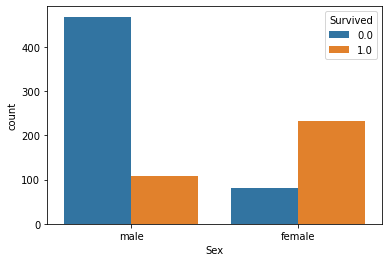

In [12]:
# How does survival depend on gender
sns.countplot(x = df['Sex'],hue=df['Survived'])

More Males died than they survived, more women survived than they died

<AxesSubplot:xlabel='SibSp', ylabel='count'>

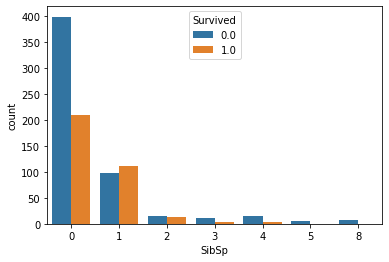

In [13]:
# Sibling or spouse count and survival
sns.countplot(x = df['SibSp'],hue=df['Survived'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

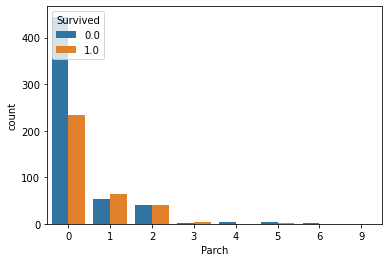

In [14]:
# Parent child count and survival
sns.countplot(x = df['Parch'],hue=df['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

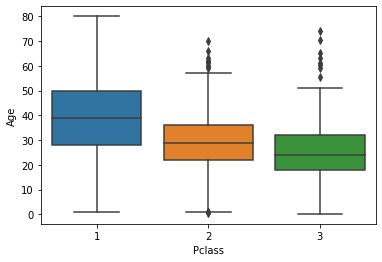

In [15]:
# Age dependence on the Pclass
sns.boxplot(y = df['Age'],x = df['Pclass'])

Average age of people in pclass 1 is higher than that of 2 and 3 class 

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

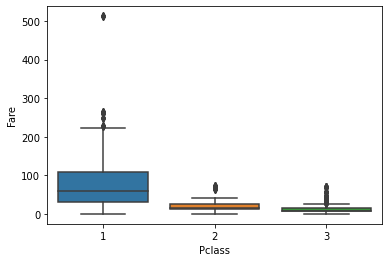

In [16]:
# 
sns.boxplot(y = df['Fare'],x = df['Pclass'])

People in Pclass 1 are richer than 2 and 3

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

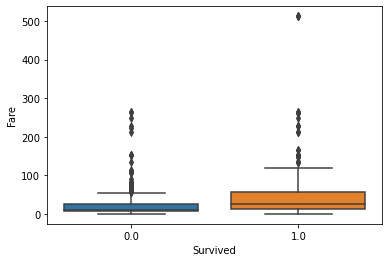

In [17]:
sns.boxplot(x = df['Survived'],y =df['Fare'])

People on an average who survived were more richer

<AxesSubplot:xlabel='Survived', ylabel='Age'>

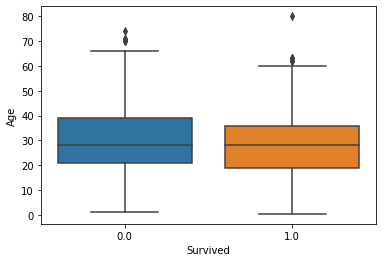

In [18]:
sns.boxplot(x = df['Survived'],y =df['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Age'>

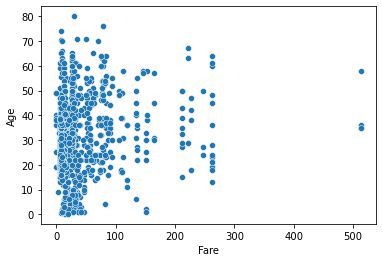

In [19]:
# Survival dependence on age
sns.scatterplot(y = df['Age'],x = df['Fare'])

In [20]:
#Survival depends on Embarked
train_data.groupby('Embarked').Survived.sum()

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

<AxesSubplot:ylabel='PassengerId'>

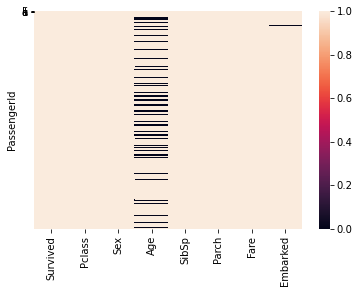

In [21]:
sns.heatmap(train_data.notnull(),yticklabels='False' )

In [22]:
# train_data['FamilySize'] = train_data['SibSp']+train_data['Parch']+1
# train_data = train_data.drop(columns=['SibSp','Parch'])
# # sns.heatmap(train_data.corr(),annot=True)
# test_data['FamilySize'] = test_data['SibSp']+test_data['Parch']+1
# test_data = test_data.drop(columns=['SibSp','Parch'])

# Handling Missing Values 

In [23]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,5
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1


In [24]:
print(df['Embarked'].mode())

0    S
dtype: object


In [25]:
#Drop Embarked Null Rows
df['Embarked'].fillna('S',inplace=True)
df['Embarked'].isnull().sum()

0

In [26]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [27]:
df.Age.isnull().sum()

0

In [28]:
df.Fare.fillna(df['Fare'].median(),inplace=True)

In [29]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
Title          0
dtype: int64

In [30]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [31]:
df_train = df.dropna(how='any')

In [32]:
df_train.shape

(204, 12)

In [33]:
df_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
Title       0
dtype: int64

# Binning

In [34]:
bins = [0,6,12,21,40,100]
labels =[1,2,3,4,5]
train_data['binned'] = pd.cut(train_data['Age'], bins,labels=labels)
train_data = train_data.drop(columns=['Age'])
test_data['binned'] = pd.cut(test_data['Age'], bins,labels=labels)
test_data = test_data.drop(columns=['Age'])
print(train_data)
print(test_data)


             Survived  Pclass     Sex  SibSp  Parch     Fare Embarked binned
PassengerId                                                                 
1                   0       3    male      1      0   7.2500        S      4
2                   1       1  female      1      0  71.2833        C      4
3                   1       3  female      0      0   7.9250        S      4
4                   1       1  female      1      0  53.1000        S      4
5                   0       3    male      0      0   8.0500        S      4
...               ...     ...     ...    ...    ...      ...      ...    ...
887                 0       2    male      0      0  13.0000        S      4
888                 1       1  female      0      0  30.0000        S      3
889                 0       3  female      1      2  23.4500        S    NaN
890                 1       1    male      0      0  30.0000        C      4
891                 0       3    male      0      0   7.7500        Q      4

In [35]:
bins = [0,7,14,31,520]
labels =[1,2,3,4]
train_data['binned2'] = pd.cut(train_data['Fare'], bins,labels=labels)
train_data = train_data.drop(columns=['Fare'])
test_data['binned2'] = pd.cut(test_data['Fare'], bins,labels=labels)
test_data = test_data.drop(columns=['Fare'])
print(train_data)
print(test_data)


             Survived  Pclass     Sex  SibSp  Parch Embarked binned binned2
PassengerId                                                                
1                   0       3    male      1      0        S      4       2
2                   1       1  female      1      0        C      4       4
3                   1       3  female      0      0        S      4       2
4                   1       1  female      1      0        S      4       4
5                   0       3    male      0      0        S      4       2
...               ...     ...     ...    ...    ...      ...    ...     ...
887                 0       2    male      0      0        S      4       2
888                 1       1  female      0      0        S      3       3
889                 0       3  female      1      2        S    NaN       3
890                 1       1    male      0      0        C      4       3
891                 0       3    male      0      0        Q      4       2

[891 rows x

# Handling Categorical Variables

In [36]:
train_data = pd.get_dummies(train_data,drop_first=True,columns=['Sex','Embarked','Pclass','binned','binned2'])

In [37]:
test_data =  pd.get_dummies(test_data,drop_first=True,columns=['Sex','Embarked','Pclass','binned','binned2'])

In [38]:
df = pd.get_dummies(df,drop_first=True,columns=['Sex','Embarked','Pclass','Title'])

In [39]:
train_data
df

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title_2,Title_3,Title_4,Title_5
PassengerId,,,,,,,,,,,,,,,,,
1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1,0,0,0,0
2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0,0,1,0,0
3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1,1,0,0,0
4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,0,0,0,1,0,0
5,0.0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,"Spector, Mr. Woolf",28.0,0,0,A.5. 3236,8.0500,NaN,1,0,1,0,1,0,0,0,0
1306,NaN,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,0,0,0,0,0,0,0,0,1
1307,NaN,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,0,1,0,1,0,0,0,0


In [40]:
test_data

,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,binned_2,binned_3,binned_4,binned_5,binned2_2,binned2_3,binned2_4
PassengerId,,,,,,,,,,,,,,
892,0,0,1,1,0,0,1,0,0,1,0,1,0,0
893,1,0,0,0,1,0,1,0,0,0,1,0,0,0
894,0,0,1,1,0,1,0,0,0,0,1,1,0,0
895,0,0,1,0,1,0,1,0,0,1,0,1,0,0
896,1,1,0,0,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,0,1,0,1,0,1,0,0,0,0,1,0,0
1306,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1307,0,0,1,0,1,0,1,0,0,1,0,1,0,0


## Feature Scaling 

In [41]:
# scaler = StandardScaler()
# #Comment one of these

# # All features
# cols_scale = [i for i in train_data.columns if i!='PassengerId' and i!='Survived']

# #Applied to only Numerical features
# # cols_scale = ['Fare']

In [42]:
# df_cols_scale = train_data.loc[:,cols_scale]
# df_cols_scale = scaler.fit_transform(df_cols_scale)
# train_data[cols_scale] = df_cols_scale
# train_data

In [43]:
# df_cols_scale = test_data[cols_scale]
# df_cols_scale = scaler.fit_transform(df_cols_scale)
# test_data[cols_scale] = df_cols_scale
# test_data

# Train and Split

In [44]:
X_train = train_data.drop(columns=['Survived']).values
y_train = train_data['Survived'].values
X_test = test_data.values

In [45]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_train,y_train,test_size = 0.3,random_state=42)

# SVM classifier

In [46]:
from sklearn.svm import SVC

In [47]:
svc = SVC(C = 300,gamma = 0.01,kernel='rbf')
# C=3,g = 0.03 83.5%

In [48]:
svc.fit(X_train1,y_train1)

SVC(C=300, gamma=0.01)

In [49]:
svc.score(X_train1,y_train1)

0.8362760834670947

In [50]:
svc.score(X_test1,y_test1)

0.8059701492537313

In [51]:
svc.fit(X_train,y_train)

SVC(C=300, gamma=0.01)

In [52]:
svc.score(X_train,y_train)

0.8271604938271605

In [53]:
y_pred = svc.predict(X_test)

# Performing Logistic Regession

In [54]:
LogReg = LogisticRegression(max_iter=100000)

In [55]:
LogReg.fit(X_train1,y_train1)

LogisticRegression(max_iter=100000)

In [56]:
LogReg.score(X_test1,y_test1)

0.8022388059701493

In [57]:
LogReg.fit(X_train,y_train)
LogReg.score(X_train,y_train)

0.8058361391694725

# Wrapping up

In [58]:
#Creating a new Column named Survivied in test_data
test_data['Survived'] = y_pred

In [59]:
test_data

,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,binned_2,binned_3,binned_4,binned_5,binned2_2,binned2_3,binned2_4,Survived
PassengerId,,,,,,,,,,,,,,,
892,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0
893,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
894,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0
895,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0
896,1,1,0,0,1,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
1306,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
1307,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0


In [60]:
test_data = test_data[['Survived']]

In [61]:
test_data

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [62]:
r = test_data.to_csv('Kaggle_Titanic6.csv',header=True,index=False)